In [1]:
%run _imports.ipynb

In [2]:
# Standards for figures format:
# - length single column figure: 89 mm
# - length 1.5 column figure: 120-136 mm
# - length 2 columns figure: 183 mm
# - max. height figure : 247 mm

fig_length = {1:   3.50394,    # 1 column
              1.5: 5.35433,    # 1.5 columns
              2:   7.20472}    # 2 columns
fig_height = 9.72441 # maxium height
fontsize_title = 9
fontsize_label = 8
fontsize_legend = 8
fontsize_axs = 8
spineline_width = 0.6

### Import results

In [3]:
total_ghgs = pd.read_csv(RESULTS_IMPORT_DIR / "fig1_total_ghgs_06-02-2024.csv", index_col=0)
breakdown_ghgs = pd.read_csv(RESULTS_IMPORT_DIR / "fig2_breakdown_ghgs_07-02-2024.csv", index_col=0)
breakdown_reagents_ghgs = pd.read_csv(RESULTS_IMPORT_DIR / "ESI_breakdown_reagents_ghgs_20-12-2023.csv", index_col=0)
actual_mitigation_potential = pd.read_csv(RESULTS_IMPORT_DIR / "fig4_actual_mitigaiton_potential_22-12-2023.csv", index_col=0)

metals_ev_demand = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="EV demand").ffill(axis=0)

In [4]:
METALS_LIST = [
    "Lithium, brine",
    "Lithium, spodumene",
    "Cobalt",
    "Graphite, natural",
    "Graphite, synthetic"
]

### Minerals demand and GHG-emission intensity

In [43]:
total_demand = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="Total demand").ffill(axis=0)
ev_demand = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="EV demand").ffill(axis=0)

ghg_emission_intensity_metals = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="GHG intensity metals", index_col=0).ffill(axis=0).T
ghg_emission_intensity_commodities = pd.read_excel(Path(DATA_DIR / "IEA_Minerals demand.xlsx"), sheet_name="GHG intensity commodities", index_col=0).ffill(axis=0)

In [44]:
total_demand_2022 = total_demand[(total_demand["Scenario"] == "STEPS") & (total_demand["Year"] == 2022)].reset_index()
total_demand_2050_NZE = total_demand[(total_demand["Scenario"] == "NZE") & (total_demand["Year"] == 2050)].reset_index()

ev_demand_2022 = ev_demand[(ev_demand["Scenario"] == "STEPS") & (ev_demand["Year"] == 2022)].reset_index()
ev_demand_2050_NZE = ev_demand[(ev_demand["Scenario"] == "NZE") & (ev_demand["Year"] == 2050)].reset_index()

In [45]:
share_ev_demand = ev_demand.iloc[:,2:].div(total_demand.iloc[:,2:]).multiply(100)
share_ev_demand = pd.concat([total_demand.iloc[:,:2], share_ev_demand], axis=1)

In [46]:
total_demand_increase_rltv_2050_NZE = total_demand_2050_NZE.iloc[:,3:].div(total_demand_2022.iloc[:,3:], axis=0)
total_demand_increase_rltv_2050_NZE = total_demand_increase_rltv_2050_NZE.T.sort_values(by=0, ascending=False)
total_demand_increase_rltv_2050_NZE

,0
Lithium,16.104835
Manganese,12.893648
Nickel,8.242071
Graphite,5.907962
Neodymium,5.631873
Cobalt,4.263434
Copper,3.025074
Silicon,2.900626


In [47]:
total_demand_increase_abs_2050_NZE = total_demand_2050_NZE.iloc[:,3:] - total_demand_2022.iloc[:,3:]
ev_demand_increase_abs_2050_NZE = ev_demand_2050_NZE.iloc[:,3:] - ev_demand_2022.iloc[:,3:]

demand_increase_by_ev = ev_demand_increase_abs_2050_NZE.div(total_demand_increase_abs_2050_NZE).T
demand_increase_by_ev

,0
Copper,0.276319
Lithium,0.935750
Cobalt,1.015762
Graphite,0.752777
Nickel,0.895996
Manganese,0.895867
Silicon,0.540747
Neodymium,0.740462


In [48]:
ghg_emission_intensity_metals

Emission intensity,Low,High
Lithium hydroxide,7.611945,16.039000
Manganese sulfate,0.748847,0.748847
Nickel sulfate,4.000000,4.000000
Graphite,10.707488,11.080017
Neodymium oxide,25.000000,25.000000
Cobalt sulfate,12.775562,12.775562
Copper cathode,4.100000,4.100000
"Silicon, metallurgical",12.884945,12.884945


In [49]:
ghg_emission_intensity_metals.loc["Lithium hydroxide","Low"]

7.611945

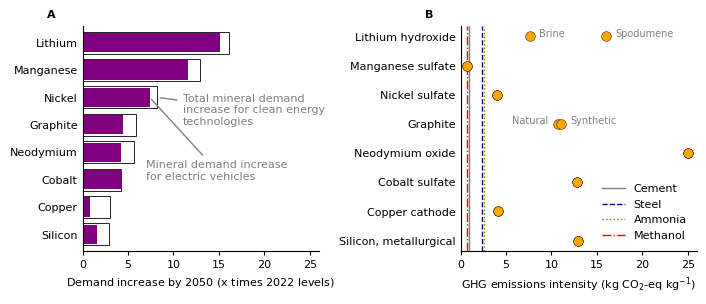

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(fig_length[2]*1.1, fig_height*0.3))

total_demand_increase_rltv_2050_NZE.plot.barh(ax=axs[0], color="white", edgecolor="black", width=0.80, fontsize=fontsize_axs, lw=spineline_width, zorder=2, legend=False)

share_rltv_increase_ev_2050_NZE = total_demand_increase_rltv_2050_NZE.multiply(demand_increase_by_ev)
share_rltv_increase_ev_2050_NZE = share_rltv_increase_ev_2050_NZE.reindex(index=total_demand_increase_rltv_2050_NZE.index)
share_rltv_increase_ev_2050_NZE.plot.barh(ax=axs[0], color="purple", edgecolor="none", width=0.70, fontsize=fontsize_axs, lw=spineline_width, zorder=2, legend=False)

#ghg_intensity_ordered = ghg_emission_intensity_metals.T.reindex(index=total_demand_increase_rltv_2050_NZE.index)
axs[1].plot(ghg_emission_intensity_metals["Low"], ghg_emission_intensity_metals.index, zorder=3, marker="o", mfc="orange", mec='black', ms=7, mew=0.3, ls='None', lw=0.5)
axs[1].plot(ghg_emission_intensity_metals["High"], ghg_emission_intensity_metals.index, zorder=3, marker="o", mfc="orange", mec='black', ms=7, mew=0.3, ls='None', lw=0.5)


commodities_line = ["-", "--", ":", "dashdot"]
commodities_color = ["grey", "navy", "olive", "red"]
count_com = 0
for index, row in ghg_emission_intensity_commodities.iterrows():
    axs[1].axvline(x=row["Value"], color=commodities_color[count_com], linestyle=commodities_line[count_com], lw=1, label=index)
    count_com += 1

axs[0].set_title("A", loc='left', x=-0.15, fontweight='bold', fontsize=fontsize_axs)
axs[1].set_title("B", loc='left', x=-0.15, fontweight='bold', fontsize=fontsize_axs)

axs[0].set_xlabel('Demand increase by 2050 (x times 2022 levels$^{}$)', fontsize=fontsize_label)
axs[1].set_xlabel('GHG emissions intensity (kg CO$_2$-eq kg$^{-1}$)', fontsize=fontsize_label)

x_max = 26
for ax in axs:
    ax.invert_yaxis()
    ax.tick_params(axis='x', which='major', direction='out', length=3, labelsize=fontsize_axs)
    ax.tick_params(axis='y', which='major', direction='out', length=0, labelsize=fontsize_axs)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xlim(0, x_max)

#for index, row in ghg_intensity_ordered.iterrows():
#    axs[1].axhline(y=index, xmin=row["Low"]/x_max, xmax=row["High"]/x_max, color="black", linestyle="--", lw=1)

# Anote figure A
axs[0].annotate('Total mineral demand\nincrease for clean energy\ntechnologies',
             xy=(total_demand_increase_rltv_2050_NZE.loc["Nickel"].values[0], 2),
             xytext=(11,3), arrowprops=dict(arrowstyle='-', color='grey'), fontsize=fontsize_axs, color='grey')
axs[0].annotate('Mineral demand increase\nfor electric vehicles',
             xy=(share_rltv_increase_ev_2050_NZE.loc["Nickel"].values[0], 2),
             xytext=(7,5), arrowprops=dict(arrowstyle='-', color='grey'), fontsize=fontsize_axs, color='grey')

# Anote figure B
axs[1].annotate('Brine',
             xy=(ghg_emission_intensity_metals.loc["Lithium hydroxide","Low"], 0.2),
             xytext=(ghg_emission_intensity_metals.loc["Lithium hydroxide","Low"]+1,0), fontsize=fontsize_axs-1, color='grey')
axs[1].annotate('Spodumene',
             xy=(ghg_emission_intensity_metals.loc["Lithium hydroxide","High"], 0),
             xytext=(ghg_emission_intensity_metals.loc["Lithium hydroxide","High"]+1,0),  fontsize=fontsize_axs-1, color='grey')

axs[1].annotate('Natural',
             xy=(ghg_emission_intensity_metals.loc["Graphite","Low"], 0.4),
             xytext=(ghg_emission_intensity_metals.loc["Graphite","Low"]-5,3), fontsize=fontsize_axs-1, color='grey')
axs[1].annotate('Synthetic',
             xy=(ghg_emission_intensity_metals.loc["Graphite","High"], 0),
             xytext=(ghg_emission_intensity_metals.loc["Graphite","High"]+1,3),  fontsize=fontsize_axs-1, color='grey')


handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles=handles, labels=labels, loc='lower right',  ncol=1, frameon=False, edgecolor='black',  facecolor='black', fontsize=fontsize_legend)

fig.subplots_adjust(hspace=0.3, wspace=0.6)

plt.savefig(Path(str(r"..\reports") + '/ev_minerals_demand_IEA_NZE_2050.jpg'), dpi=600, bbox_inches='tight')

### Breakdown GHG emissions

Contribution by source to the total life cycle emissions

In [106]:
def normalize_breakdown(df_raw, metal):
    df = df_raw.loc[metal]
    df.reset_index(inplace=True)
    df = df.pivot(index='Source', columns='Stage', values='Value')

    df_normalized = df.div(df.values.sum()).multiply(100)
    df_normalized["Total"] = df_normalized.sum(axis=1)

    df_normalized = df_normalized.reindex([CONTRIBUTORS_LIST], axis='index', level=0)
    df_normalized = df_normalized[["Mining", "Concentration", "Refining", "Total"]]
    return df_normalized

In [107]:
normalize_breakdown(breakdown_ghgs, "Lithium, brine")

Stage,Mining,Concentration,Refining,Total
"Direct emissions, process",0.000000,0.000000,0.000000,0.000000
"Direct emissions, heat",0.000000,0.094464,33.287319,33.381784
"Direct emissions, fuels",0.988312,0.000000,2.954176,3.942487
Electricity consumption,0.079879,0.192423,14.204716,14.477018
Fuels consumption,0.254691,0.022854,8.817794,9.095339
Reagents consumption,0.000000,6.710397,30.738173,37.448570
Other,1.388116,0.000063,0.266623,1.654802


In [108]:
normalize_breakdown(breakdown_ghgs, "Lithium, brine").sum()

Stage
Mining             2.710998
Concentration      7.020201
Refining          90.268801
Total            100.000000
dtype: float64

In [109]:
normalize_breakdown(breakdown_ghgs, "Lithium, spodumene")

Stage,Mining,Concentration,Refining,Total
"Direct emissions, process",0.0,0.000000,0.000000,0.000000
"Direct emissions, heat",0.0,0.434602,18.922127,19.356729
"Direct emissions, fuels",0.0,0.076508,0.000000,0.076508
Electricity consumption,0.0,0.380471,21.652105,22.032576
Fuels consumption,0.0,0.041587,4.079195,4.120782
Reagents consumption,0.0,0.000000,15.780596,15.780596
Other,0.0,0.134155,38.498655,38.632810


In [110]:
normalize_breakdown(breakdown_ghgs, "Lithium, spodumene").sum()

Stage
Mining             0.000000
Concentration      1.067323
Refining          98.932677
Total            100.000000
dtype: float64

In [111]:
normalize_breakdown(breakdown_ghgs, 'Cobalt')

Stage,Mining,Concentration,Refining,Total
"Direct emissions, process",0.000000,0.000000,0.000000,0.000000
"Direct emissions, heat",0.000000,0.000000,8.207012,8.207012
"Direct emissions, fuels",16.590664,0.000000,0.000000,16.590664
Electricity consumption,0.000000,0.612720,9.451926,10.064646
Fuels consumption,4.294225,0.000000,1.736413,6.030639
Reagents consumption,0.000000,13.875450,19.077732,32.953182
Other,1.372631,4.236581,20.544646,26.153858


In [112]:
normalize_breakdown(breakdown_ghgs, 'Cobalt').sum()

Stage
Mining            22.257520
Concentration     18.724752
Refining          59.017729
Total            100.000000
dtype: float64

In [113]:
normalize_breakdown(breakdown_ghgs, 'Graphite, natural')

Stage,Mining,Concentration,Refining,Total
"Direct emissions, process",0.000374,0.000000,0.582886,0.583259
"Direct emissions, heat",0.000000,3.952928,0.584877,4.537805
"Direct emissions, fuels",1.654489,0.076677,0.029598,1.760764
Electricity consumption,1.885184,11.603758,64.708725,78.197667
Fuels consumption,0.428238,0.872011,0.108406,1.408655
Reagents consumption,0.000000,0.030311,7.687387,7.717698
Other,0.393067,0.878141,4.522943,5.794152


In [114]:
normalize_breakdown(breakdown_ghgs, 'Graphite, natural').sum()

Stage
Mining             4.361352
Concentration     17.413825
Refining          78.224823
Total            100.000000
dtype: float64

In [115]:
normalize_breakdown(breakdown_ghgs, 'Graphite, synthetic')

Stage,Mining,Concentration,Refining,Total
"Direct emissions, process",0.000000,53.194218,0.749133,53.943351
"Direct emissions, heat",0.000000,7.488184,6.121968,13.610152
"Direct emissions, fuels",0.000000,0.000000,0.000000,0.000000
Electricity consumption,0.033673,3.951463,19.289275,23.274411
Fuels consumption,0.000000,1.289840,1.054509,2.344348
Reagents consumption,0.000000,0.004190,0.000000,0.004190
Other,6.798450,0.021014,0.004083,6.823547


In [116]:
normalize_breakdown(breakdown_ghgs, 'Graphite, synthetic').sum()

Stage
Mining             6.832123
Concentration     65.948909
Refining          27.218968
Total            100.000000
dtype: float64

C:\Users\istrateir\AppData\Local\Temp\ipykernel_84180\1871376123.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrateir\AppData\Local\Temp\ipykernel_84180\1871376123.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrateir\AppData\Local\Temp\ipykernel_84180\1871376123.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrateir\AppData\Local\Temp\ipykernel_84180\1871376123.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)
C:\Users\istrate

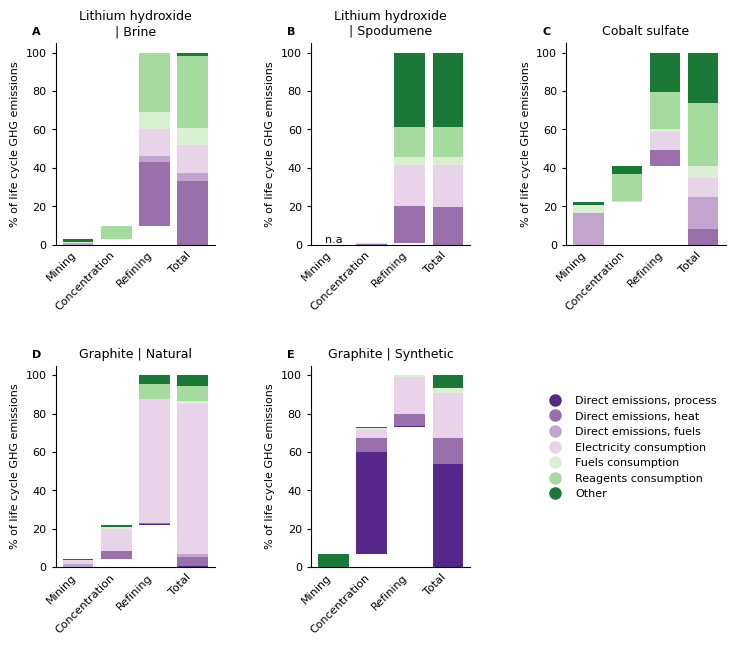

In [123]:
system_color = ['#542788',
                '#9970ab',
                '#c2a5cf',
                '#e7d4e8',
                '#d9f0d3',
                '#a6dba0',
                '#1b7837']

titles = [
 #   r'$\mathrm{Lithium}_{\mathrm{Brine}}$',
 "Lithium hydroxide\n| Brine",
 "Lithium hydroxide\n| Spodumene",
    "Cobalt sulfate",
    "Graphite | Natural",
    "Graphite | Synthetic"
]

width=0.8

fig, axs = plt.subplots(2, 3, figsize=(fig_length[2]*1.2, fig_height*0.7))
fig.delaxes(axs[1, 2])

metal_count = 0
main_title = ["A", "B", "C", "D", "E"]

for row in range(2):
     
    for col in range(3):
        if metal_count < 5:
            axs[row,col].set_title(main_title[metal_count], loc='left', x=-0.15, fontweight='bold', fontsize=fontsize_axs)
            axs[row,col].set_title(titles[metal_count], loc='center', fontsize=fontsize_title)

            metal_data = normalize_breakdown(breakdown_ghgs, METALS_LIST[metal_count])

            bottom = 0
            stage_loc = 0
            for stage in metal_data.columns:
                cont_count = 0
                if stage == "Total":
                    bottom = 0
                else:
                    pass
                for contributor in metal_data.index:
                    axs[row,col].bar(stage, metal_data[stage][contributor], bottom=bottom, color=system_color[cont_count],
                                width=width, lw=spineline_width, zorder=2)

                    bottom += metal_data[stage][contributor]
                    cont_count += 1
                stage_loc += 1

            axs[row,col].set_ylim(0, 105)
            axs[row,col].set_ylabel('% of life cycle GHG emissions', fontsize=fontsize_label)
            axs[row,col].tick_params(axis='y', which='major', direction='out', length=3, labelsize=fontsize_axs)
            axs[row,col].tick_params(axis='x', which='major', direction='out', length=0, labelsize=fontsize_axs)
        
            axs[row,col].set_xticklabels(metal_data.columns, rotation=45, ha="right", fontsize=fontsize_axs)

            axs[row,col].spines['right'].set_visible(False)
            axs[row,col].spines['top'].set_visible(False)
        else:
            pass
        metal_count += 1

axs[0,1].annotate("n.a", xy=(0, 0.2), ha='center', va='bottom', fontsize=fontsize_axs, color="black")

# LEGEND
handles = []
for i in range(len(CONTRIBUTORS_LIST)):
    patch = Line2D([0], [0], color=system_color[i], label=CONTRIBUTORS_LIST[i], ls='None', marker='o', ms=8)
    handles.append(patch)
axs[1,1].legend(handles=handles, bbox_to_anchor=(1.4,0.9), ncol=1, frameon=False, edgecolor='black',  facecolor='White', fontsize=fontsize_legend)

fig.subplots_adjust(wspace=0.6, hspace=0.6)

plt.savefig(Path(str(r"..\reports") + '/GHG_emissions_breakdown.jpg'), dpi=600, bbox_inches='tight')

### Breakdown reagents contribution

In [171]:
breakdown_reagents_ghgs

,Stage,Reagent,Value
Metal,,,
"Lithium, brine",Mining,"neutralising agent, sodium hydroxide-equivalent",0.0
"Lithium, brine",Mining,"hydrochloric acid, without water, in 30% solut...",0.0
"Lithium, brine",Mining,"soda ash, light",0.0
"Lithium, brine",Mining,"quicklime, milled, packed",0.0
"Lithium, brine",Mining,kerosene,0.0
...,...,...,...
"Graphite, synthetic",Refining,hydrogen fluoride,0.0
"Graphite, synthetic",Refining,pitch,0.0
"Graphite, synthetic",Refining,"nitrogen, liquid",0.0


In [173]:
breakdown_ghgs

,Stage,Source,Value
Metal,,,
"Lithium, spodumene",Mining,"Direct emissions, process",0.000000
"Lithium, spodumene",Mining,"Direct emissions, heat",0.000000
"Lithium, spodumene",Mining,"Direct emissions, fuels",0.000000
"Lithium, spodumene",Mining,Electricity consumption,0.000000
"Lithium, spodumene",Mining,Fuels consumption,0.000000
...,...,...,...
"Lithium, brine",Refining,"Direct emissions, fuels",0.000000
"Lithium, brine",Refining,Electricity consumption,0.253946
"Lithium, brine",Refining,Fuels consumption,0.326675


TypeError: can only concatenate str (not "numpy.float64") to str

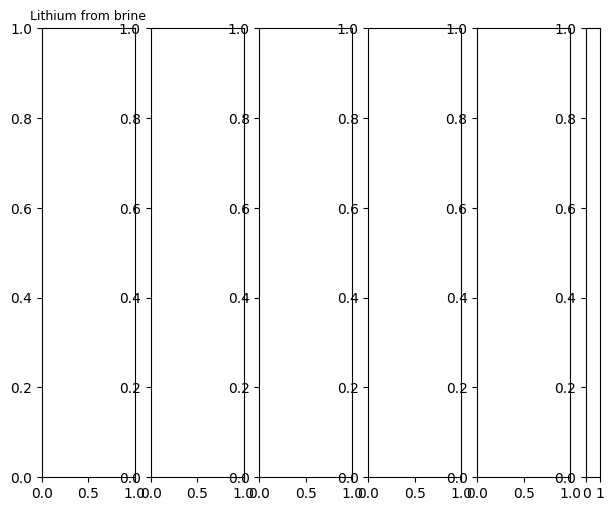

In [174]:
shorten_names = {
    "neutralising agent, sodium hydroxide-equivalent": "neutralising agent, sodium hydroxide",
    "hydrochloric acid, without water, in 30% solution state": "hydrochloric acid",
    "sodium hydroxide, without water, in 50% solution state": "sodium hydroxide",
    "hydrogen peroxide, without water, in 50% solution state": "hydrogen peroxide",
    "nitric acid, without water, in 50% solution state": "nitric acid",
    "phosphoric acid, fertiliser grade, without water, in 70% solution state": "phosporic acid",
    "kerosene": "dearomatized hydrocarbon fluid"
}

fig, axs = plt.subplot_mosaic([METALS_LIST + ["Legend"]],
                            figsize=(fig_length[2], fig_height*0.6),
                            gridspec_kw={'width_ratios': [0.2] * len(METALS_LIST) + [0.03]})

counter = 0
for metal in METALS_LIST:
    axs[metal].set_title(titles[counter], loc='center', fontsize=fontsize_title)

    df = breakdown_reagents_ghgs.loc[metal]
    df_normalized = df.div(pd.DataFrame(breakdown_ghgs.loc[metal]).sum().sum()).multiply(100)
    df_normalized["Total"] = df_normalized.sum(axis=1)
    df_normalized = df_normalized.rename(index=shorten_names)
   # df_normalized = df_normalized[(df_normalized != 0).any(axis=1)]

    if counter == 0:
        yticklabels=True
    else:
        yticklabels=False

    sns.heatmap(ax=axs[metal], data=df_normalized, cmap="Blues", vmin=0, vmax=30, annot=True, fmt='.1f', annot_kws={"size": 7}, 
                xticklabels=True, yticklabels=yticklabels, linewidths=0.8, linecolor='white', cbar=True, cbar_ax=axs['Legend'])
    
    if counter == 0:
        for lab, annot in zip(axs[metal].get_yticklabels(), axs[metal].texts):
            text = lab.get_text()
            if text in ["soda ash, light", "kerosene", "sodium hydroxide", "sulfuric acid",
                        "quicklime, milled, loose", "magnesium oxide", "lime, hydraulic", "ammonium bicarbonate", "nitric acid", "hydrogen fluoride"]:
                # set the properties of the ticklabel
                lab.set_weight('bold')

    counter += 1
    
for col in METALS_LIST:
    axs[col].set_xticklabels(df_normalized.columns, rotation = 45, ha="left", fontsize=fontsize_axs)
    axs[col].xaxis.tick_top()
    axs[col].tick_params(axis='x', which='major', direction='in', length=0, labelsize=fontsize_axs)
    axs[col].tick_params(axis='y', which='major', direction='in', length=0, labelsize=fontsize_axs)

    
for spine in axs["Legend"].spines.values():
    spine.set(visible=True, lw=spineline_width, edgecolor="black")
axs["Legend"].tick_params(axis='y', which='major', direction='out', length=4, labelsize=fontsize_axs)
    
axs['Legend'].set_ylabel('% of life cycle GHG emissions from raw material supply', fontsize=fontsize_label)

fig.subplots_adjust(wspace=0.1)

### Actual mitigation potential

In [8]:
strategies_name = {
    "BAU": "Business-as-usual",
    "ONSITE_ELEC": "Switch to wind power in raw materials supply chain",
    "PROCESS_HEAT": "Electrification of process heat",
    "CHEMICAL_WIND": "Switch to wind power in the chemical industry",
    "CHEMICAL_HEAT": "Electrification of heat in the chemical industry",
     "GLOBAL_WIND": "Switch to wind power in all sectors",
}

In [9]:
actual_mitigation_potential

,BAU,ONSITE_ELEC,PROCESS_HEAT,CHEMICALS_ELEC,CHEMICALS_HEAT,GLOBAL_ELEC
Metal,,,,,,
"Lithium, brine",3.547548,3.281049,1.633463,1.479101,0.844618,0.633570
"Lithium, spodumene",11.479599,7.939058,3.837178,3.004629,2.365323,1.854415
Cobalt,12.775562,11.569062,10.318286,8.553355,8.379684,7.755143
"Graphite, natural",10.707488,2.543166,1.964493,1.760932,1.604224,1.351308
"Graphite, synthetic",11.080017,8.258213,6.334131,6.322458,6.319786,6.224636


In [10]:
mitigation_normalized = actual_mitigation_potential.div(actual_mitigation_potential["BAU"], axis=0).multiply(100)
mitigation_normalized

,BAU,ONSITE_ELEC,PROCESS_HEAT,CHEMICALS_ELEC,CHEMICALS_HEAT,GLOBAL_ELEC
Metal,,,,,,
"Lithium, brine",100.0,92.487791,46.044836,41.693630,23.808498,17.859376
"Lithium, spodumene",100.0,69.157972,33.426061,26.173641,20.604575,16.154005
Cobalt,100.0,90.556186,80.765807,66.950912,65.591509,60.702950
"Graphite, natural",100.0,23.751282,18.346909,16.445804,14.982261,12.620213
"Graphite, synthetic",100.0,74.532500,57.167160,57.061807,57.037690,56.178941


In [76]:
ghgs_times_reduction = 1 / actual_mitigation_potential.div(actual_mitigation_potential["BAU"], axis=0)
ghgs_times_reduction

,BAU,ONSITE_ELEC,PROCESS_HEAT,CHEMICALS_ELEC,CHEMICALS_HEAT,GLOBAL_ELEC
Metal,,,,,,
"Lithium, brine",1.0,1.081224,2.171796,2.398448,4.200181,5.599300
"Lithium, spodumene",1.0,1.445965,2.991678,3.820638,4.853291,6.190415
Cobalt,1.0,1.104287,1.238148,1.493632,1.524588,1.647366
"Graphite, natural",1.0,4.210299,5.450509,6.080579,6.674560,7.923797
"Graphite, synthetic",1.0,1.341697,1.749256,1.752486,1.753227,1.780026


In [441]:
mitigation_gap = mitigation_normalized.iloc[:,-1]
mitigation_gap

Metal
Lithium, brine         17.859376
Lithium, spodumene     16.154005
Cobalt                 60.702950
Graphite, natural      12.620213
Graphite, synthetic    56.178941
Name: GLOBAL_ELEC, dtype: float64

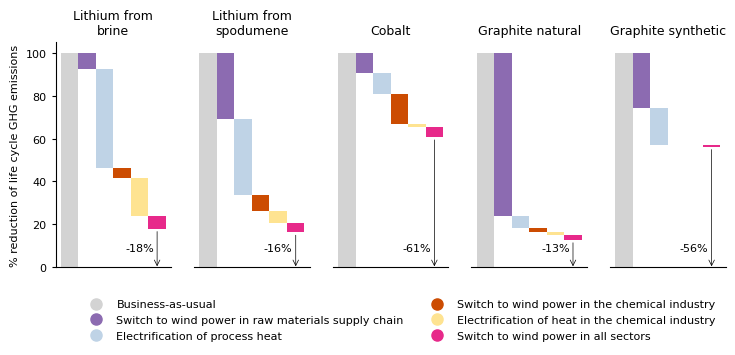

In [453]:
titles = [
 #   r'$\mathrm{Lithium}_{\mathrm{Brine}}$',
 "Lithium from\nbrine",
 "Lithium from\nspodumene",
    "Cobalt",
    "Graphite natural",
    "Graphite synthetic"
]

strategy_color = ["lightgrey", "#8c6bb1", "#bfd3e6", "#cc4c02", "#fee391", "#e7298a"]
width=1

fig, axs = plt.subplots(1, 5, figsize=(fig_length[2]*1.2, fig_height*0.3), sharey=True)

metal_count = 0
for metal in mitigation_normalized.index:
  #  axs[metal_count].set_title(main_title[metal_count], loc='left', x=-0.15, fontweight='bold', fontsize=fontsize_axs)
    axs[metal_count].set_title(titles[metal_count], loc='center', fontsize=fontsize_title)

    count_strategy = 0
    for scenario in mitigation_normalized.columns:

        if count_strategy < 2:
            axs[metal_count].bar(count_strategy, 100, color=strategy_color[count_strategy], width=width, lw=spineline_width, zorder=2)
        else:
            previous = mitigation_normalized.loc[metal].iloc[count_strategy-1]
            axs[metal_count].bar(count_strategy, previous, color=strategy_color[count_strategy], width=width, lw=spineline_width, zorder=2)

        if count_strategy > 0:
            axs[metal_count].bar(count_strategy, mitigation_normalized.loc[metal][scenario], color="white", width=width, lw=spineline_width, zorder=2)


        if count_strategy == len(mitigation_normalized):
            axs[metal_count].annotate('', xy=(count_strategy, -1), xytext=(count_strategy, mitigation_gap[metal]),
                    arrowprops=dict(arrowstyle='->', color='black', linewidth=0.5),
                    annotation_clip=False)
                
            axs[metal_count].text(count_strategy-1, 9, "-" + str(round(mitigation_gap[metal])) + '%', ha="center", va="center", rotation=0, size=fontsize_axs, 
                        )

        count_strategy += 1

    axs[metal_count].tick_params(axis='y', which='major', direction='out', length=3, labelsize=fontsize_axs)
    axs[metal_count].tick_params(axis='x', which='major', direction='out', length=0, labelsize=fontsize_axs)
    axs[metal_count].set_ylim(0, 105)
    axs[metal_count].set_xticks([])
    
    axs[metal_count].spines['right'].set_visible(False)
    axs[metal_count].spines['top'].set_visible(False)
    if metal_count > 0:
        axs[metal_count].spines['left'].set_visible(False)
        axs[metal_count].tick_params(axis='y', which='major', direction='out', length=0, labelsize=fontsize_axs)
        
        
    metal_count += 1

axs[0].set_ylabel('% reduction of life cycle GHG emissions', fontsize=fontsize_label)

patch_1 = Line2D([0], [0], color=strategy_color[0], label=strategies_name["BAU"], ls='None', marker='o', ms=8)
patch_2 = Line2D([0], [0], color=strategy_color[1], label=strategies_name["ONSITE_ELEC"], ls='None', marker='o', ms=8)
patch_3 = Line2D([0], [0], color=strategy_color[2], label=strategies_name["PROCESS_HEAT"], ls='None', marker='o', ms=8)
patch_4 = Line2D([0], [0], color=strategy_color[3], label=strategies_name["CHEMICAL_WIND"], ls='None', marker='o', ms=8)
patch_5 = Line2D([0], [0], color=strategy_color[4], label=strategies_name["CHEMICAL_HEAT"], ls='None', marker='o', ms=8)
patch_6 = Line2D([0], [0], color=strategy_color[5], label=strategies_name["GLOBAL_WIND"], ls='None', marker='o', ms=8)

axs[2].legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5, patch_6], 
              bbox_to_anchor=(3.4,-0.1), ncol=2, frameon=False, edgecolor='black',  facecolor='White', fontsize=fontsize_legend)

plt.savefig(Path(str(r"..\reports") + '/actual_mitigation_potential.jpg'), dpi=600, bbox_inches='tight')

### Decoupling GHG emissions - production volumes

In [58]:
demand_times_increase = total_demand_increase_rltv_2050_NZE * demand_increase_by_ev
demand_times_increase

,0
Cobalt,4.330635
Copper,0.835884
Graphite,4.447379
Lithium,15.070098
Manganese,11.550995
Neodymium,4.170188
Nickel,7.384865
Silicon,1.568504


In [175]:
decoupling_df = ghgs_times_reduction[["GLOBAL_ELEC"]]
decoupling_df = decoupling_df.rename(columns={"GLOBAL_ELEC": "GHG emissions reduction"})


decoupling_df.at["Lithium, brine", "Demand increase"] = demand_times_increase.loc["Lithium"].values
decoupling_df.at["Lithium, spodumene", "Demand increase"] = demand_times_increase.loc["Lithium"].values
decoupling_df.at["Cobalt", "Demand increase"] = demand_times_increase.loc["Cobalt"].values
decoupling_df.at["Graphite, natural", "Demand increase"] = demand_times_increase.loc["Graphite"].values
decoupling_df.at["Graphite, synthetic", "Demand increase"] = demand_times_increase.loc["Graphite"].values

decoupling_df

,GHG emissions reduction,Demand increase
Metal,,
"Lithium, brine",5.599300,15.070098
"Lithium, spodumene",6.190415,15.070098
Cobalt,1.647366,4.330635
"Graphite, natural",7.923797,4.447379
"Graphite, synthetic",1.780026,4.447379


In [123]:
decoupling_df.loc["Lithium, brine", "GHG emissions reduction"]

5.599299770345282

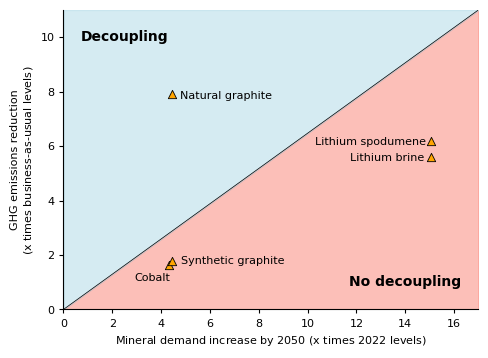

In [210]:
fig, axs = plt.subplots(1, 1, figsize=(fig_length[1.5], fig_height*0.4))

x_max = 17
y_max = 11

axs.scatter(y=decoupling_df["GHG emissions reduction"], x=decoupling_df["Demand increase"], color="orange", marker="^", 
edgecolor="black", lw=spineline_width, zorder=2)

axs.plot([0, x_max], [0, y_max], color='black', linestyle='-', lw=0.5)
axs.fill_between([0, x_max], [0, y_max], y2=0, color='salmon', alpha=0.5, zorder=1)
axs.fill_between([0, x_max], [0, y_max], y2=y_max, color='lightblue', alpha=0.5, zorder=1)


axs.text(14, 1, "No decoupling", ha="center", va="center", weight='bold', rotation=0, size=10)
axs.text(2.5, 10, "Decoupling", ha="center", va="center", weight='bold', rotation=0, size=10)

axs.text(decoupling_df.loc["Lithium, brine", "Demand increase"]-1.8, decoupling_df.loc["Lithium, brine", "GHG emissions reduction"]-0.05,
            "Lithium brine", ha="center", va="center", rotation=0, size=fontsize_axs)

axs.text(decoupling_df.loc["Lithium, spodumene", "Demand increase"]-2.5, decoupling_df.loc["Lithium, spodumene", "GHG emissions reduction"]-0.05,
            "Lithium spodumene", ha="center", va="center", rotation=0, size=fontsize_axs)

axs.text(decoupling_df.loc["Cobalt", "Demand increase"]-0.7, decoupling_df.loc["Cobalt", "GHG emissions reduction"]- 0.5,
            "Cobalt", ha="center", va="center", rotation=0, size=fontsize_axs)
axs.text(decoupling_df.loc["Graphite, natural", "Demand increase"]+2.2, decoupling_df.loc["Graphite, natural", "GHG emissions reduction"]-0.1,
            "Natural graphite", ha="center", va="center", rotation=0, size=fontsize_axs)
axs.text(decoupling_df.loc["Graphite, synthetic", "Demand increase"]+2.5, decoupling_df.loc["Graphite, synthetic", "GHG emissions reduction"],
            "Synthetic graphite", ha="center", va="center", rotation=0, size=fontsize_axs)

axs.set_xlim(0,x_max)
axs.set_ylim(0,y_max)

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

axs.tick_params(axis='y', which='major', direction='out', length=3, labelsize=fontsize_axs)
axs.tick_params(axis='x', which='major', direction='out', length=3, labelsize=fontsize_axs)

axs.set_xlabel('Mineral demand increase by 2050 (x times 2022 levels$^{}$)', fontsize=fontsize_label)
axs.set_ylabel('GHG emissions reduction\n(x times business-as-usual levels$^{}$)', fontsize=fontsize_label)

plt.savefig(Path(str(r"..\reports") + '/decoupling.jpg'), dpi=600, bbox_inches='tight')